In [1]:
import pandas  as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
import sklearn.impute
from sklearn.impute import SimpleImputer

In [2]:
 #Load the Excel file
 excel_file = '/content/EastWestAirlines.xlsx'




In [3]:
#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


In [4]:
# Load the "Data" sheet
df= pd.read_excel(excel_file, sheet_name="data")
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

1.DATA PREPROCESSING


In [5]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [6]:

print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [7]:
print(df.tail())

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
print(df.describe())

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [10]:
 #Missing values
 print("\n checking the missing values")
print(df.isnull().sum())


 checking the missing values
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [11]:
print("\n checking the duplicate values")
print(df.duplicated().sum())


 checking the duplicate values
0


In [12]:
#Remove rows with missing values
df_cleaned = df.dropna()



In [13]:
#outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Example usage for 'Balance' column
df_no_balance_outliers = remove_outliers_iqr(df_cleaned, 'Balance')

# Example usage for 'Qual_miles' column
df_no_qual_miles_outliers = remove_outliers_iqr(df_no_balance_outliers, 'Qual_miles')

# Continue removing outliers for other relevant columns as needed
# ...

# Display the cleaned DataFrame without outliers
df_no_qual_miles_outliers

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3544 rows x 12 columns]

In [14]:
# Now you can use StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_qual_miles_outliers) # Use the preprocessed data here




In [17]:
# Convert scaled data back to a DataFrame
data_scaled = pd.DataFrame(df_scaled, columns=df_no_qual_miles_outliers.columns) # Make sure column names match


EDA

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)


Sheet Names: ['Description', 'data']


In [20]:
#BASIC INFO
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc

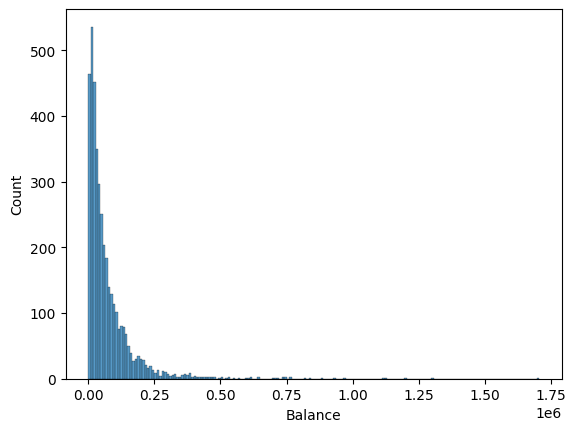

In [21]:
#Univariate analysis
sns.histplot(df['Balance'])
plt.show()

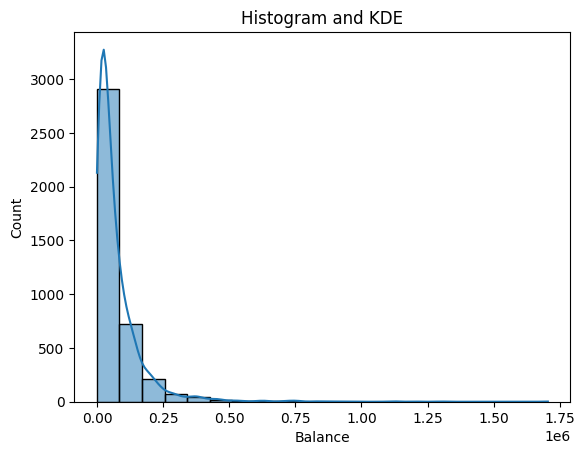

In [22]:
sns.histplot(df['Balance'], bins=20, kde=True)
plt.title('Histogram and KDE')
plt.show()

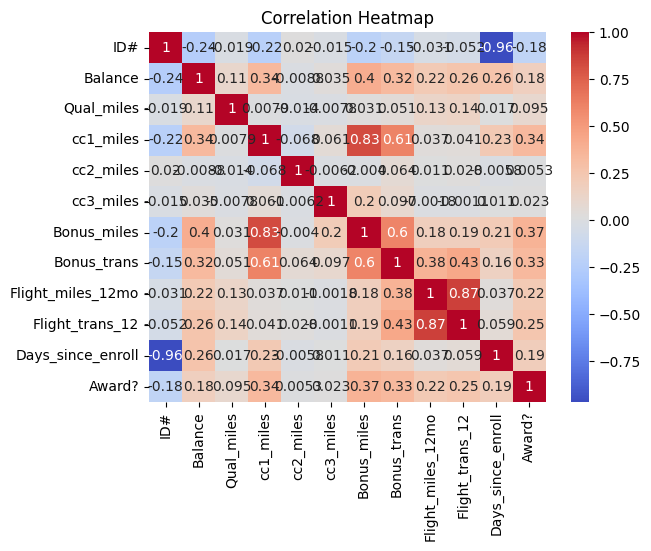

In [23]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

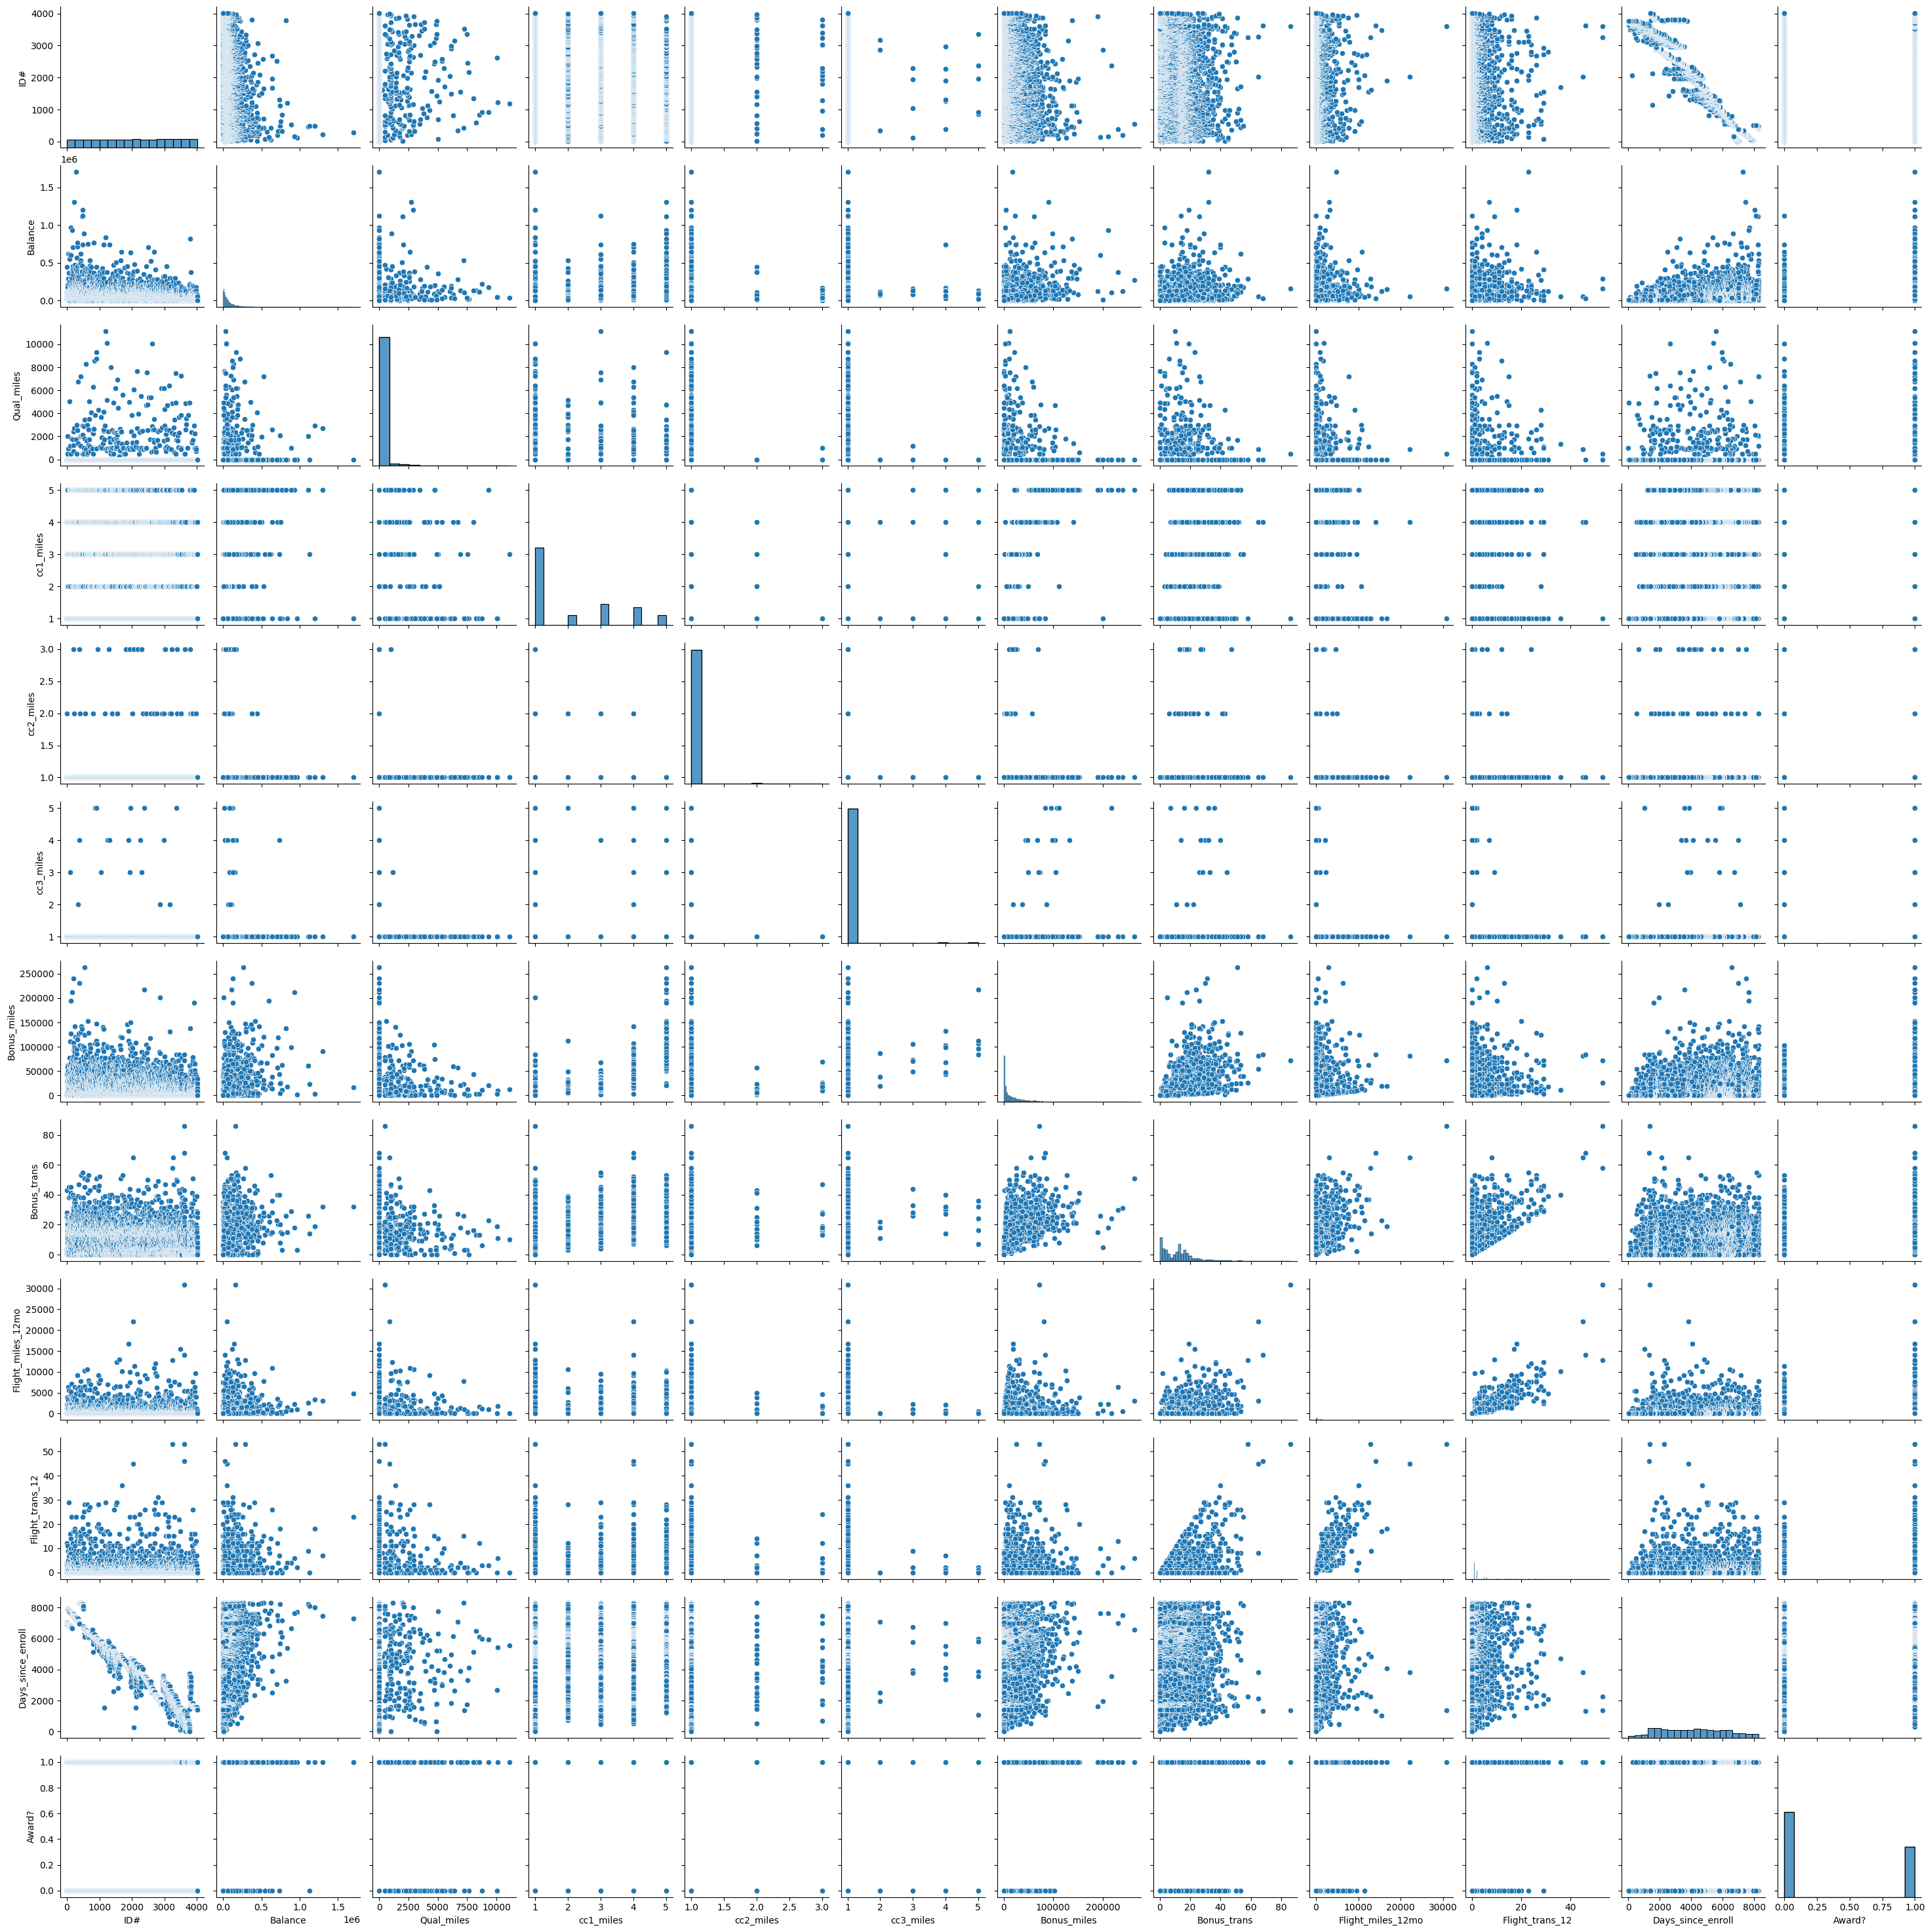

In [25]:
#Scatter plot
sns.pairplot(df)
plt.show()

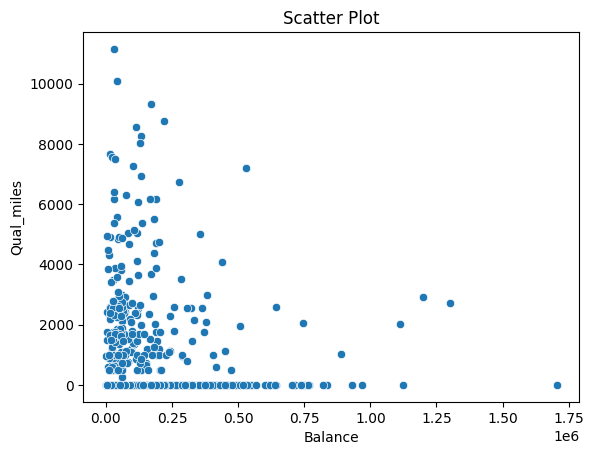

In [26]:
sns.scatterplot(x='Balance', y='Qual_miles', data=df)
plt.title('Scatter Plot')
plt.show()

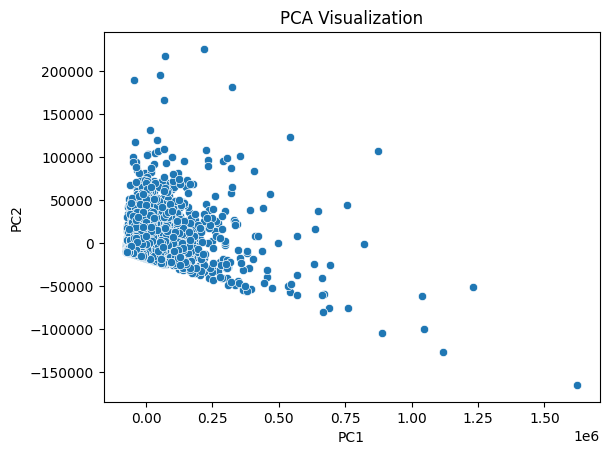

In [31]:
#PCA for cluster visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
reduced_df = pca.fit_transform(df.select_dtypes(include=[np.number]))
reduced_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Pass the DataFrame to the 'data' parameter
sns.scatterplot(x='PC1', y='PC2', data=df_pca)  # Pass df_pca to data

plt.title('PCA Visualization')
plt.show()

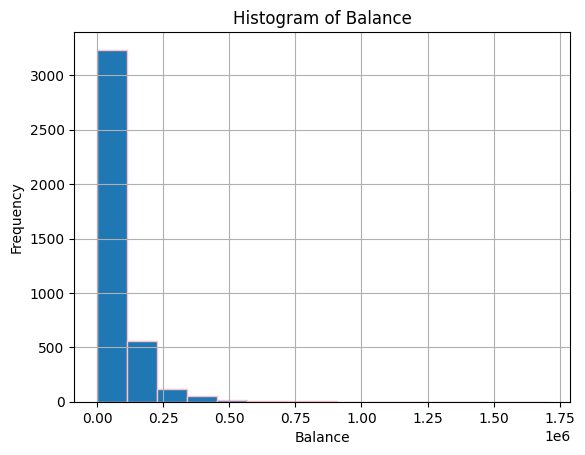

In [32]:
#Univaraiate Analysis
df['Balance'].hist(bins=15, edgecolor= 'pink')
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

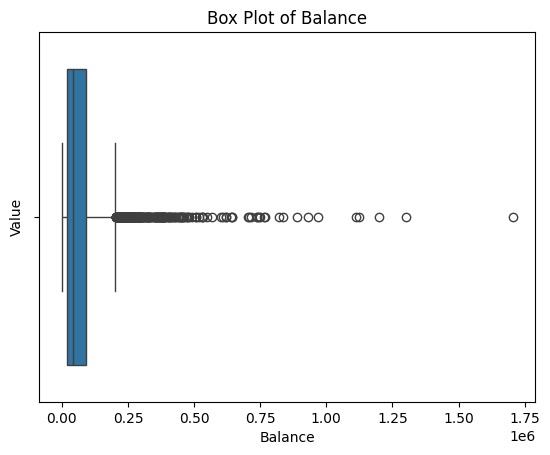

In [33]:
#BOXPLOTS
sns.boxplot(x='Balance', data=df)
plt.title('Box Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Value')
plt.show()

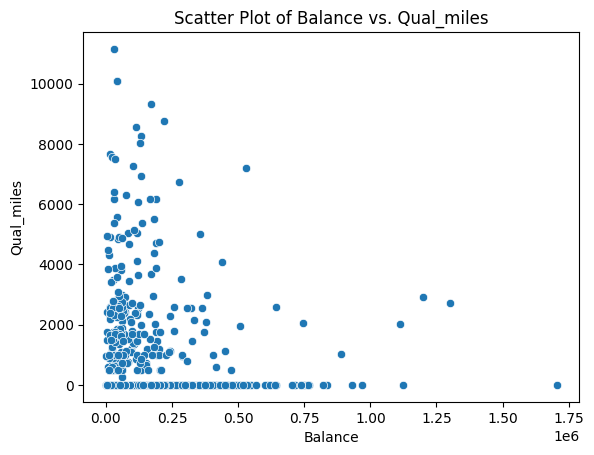

In [34]:
#SCATTERPLOT
sns.scatterplot(x='Balance', y='Qual_miles', data=df)
plt.title('Scatter Plot of Balance vs. Qual_miles')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

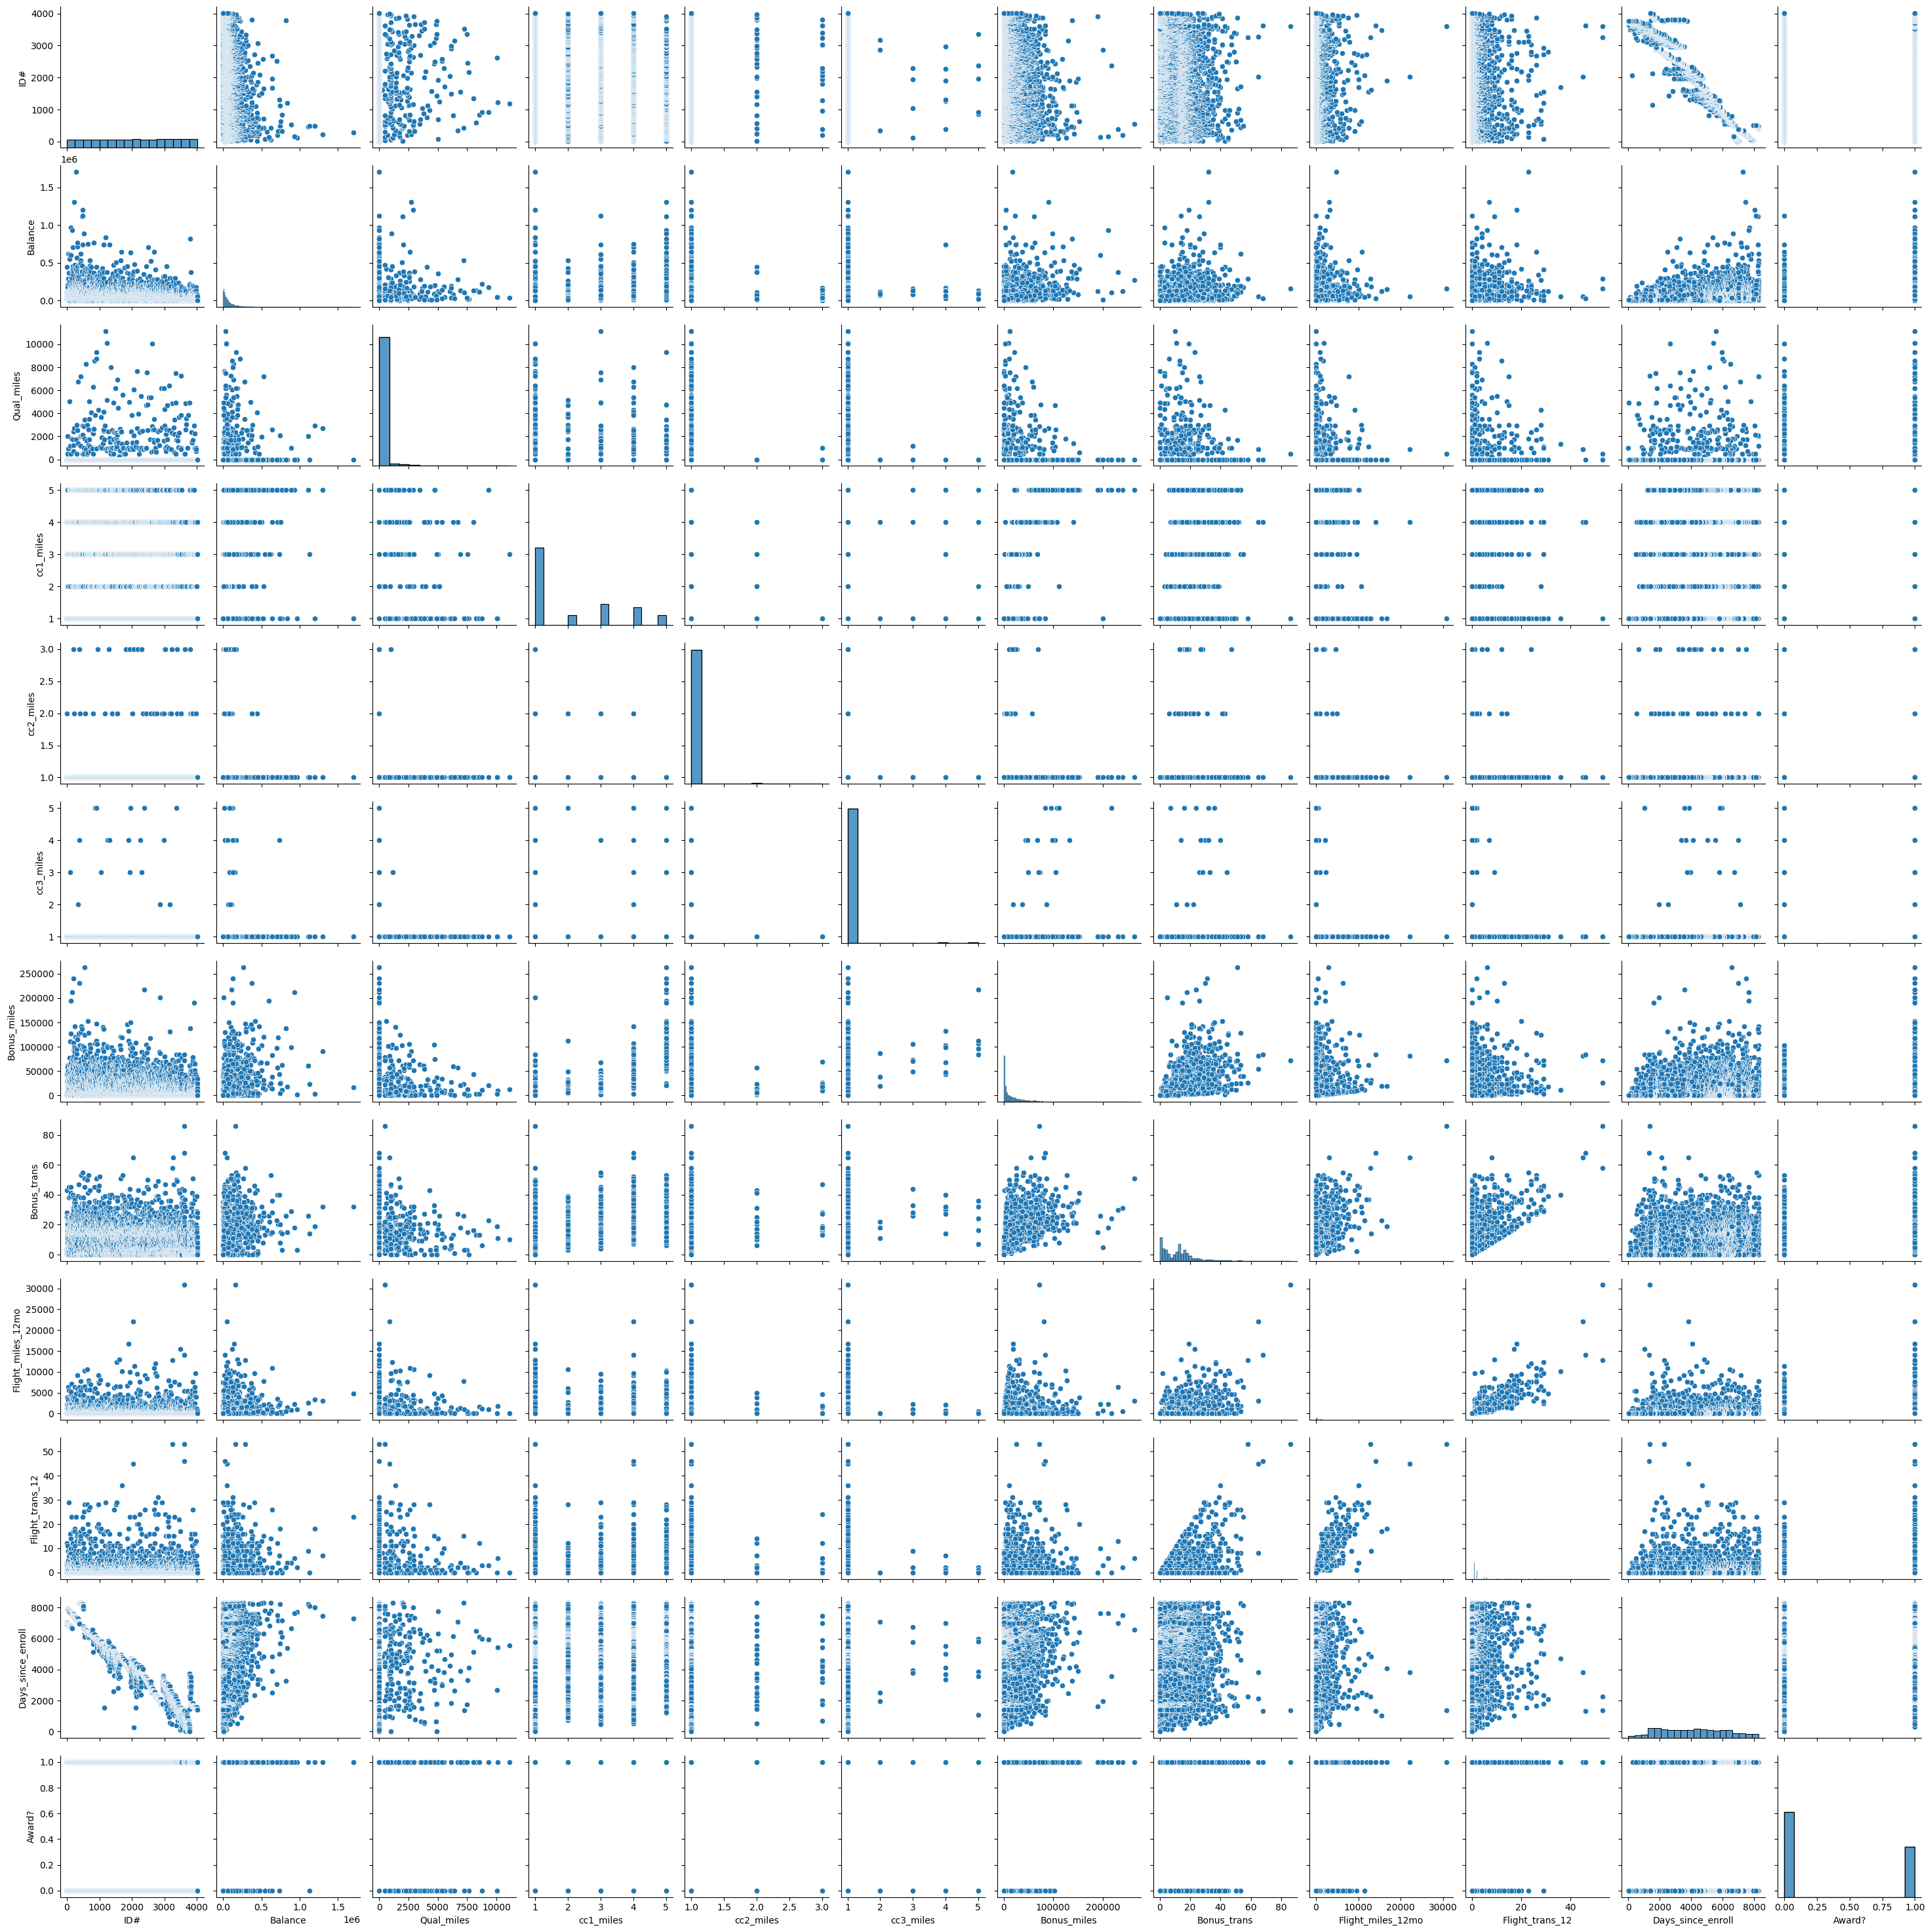

In [35]:
#PAIRPLOTS
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

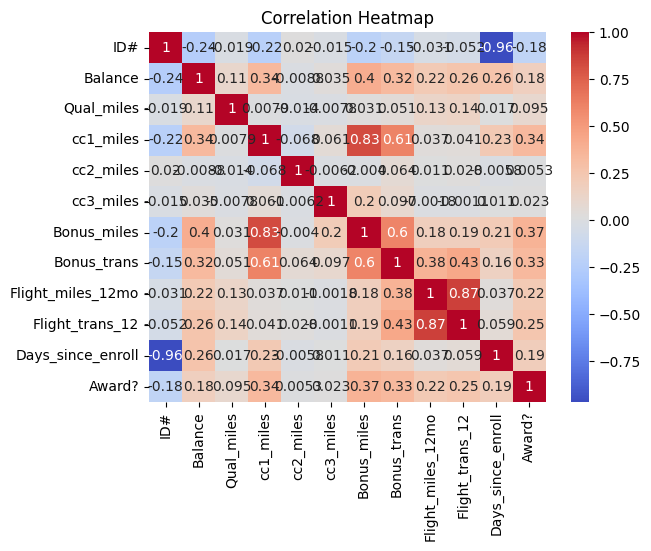

In [36]:
#Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

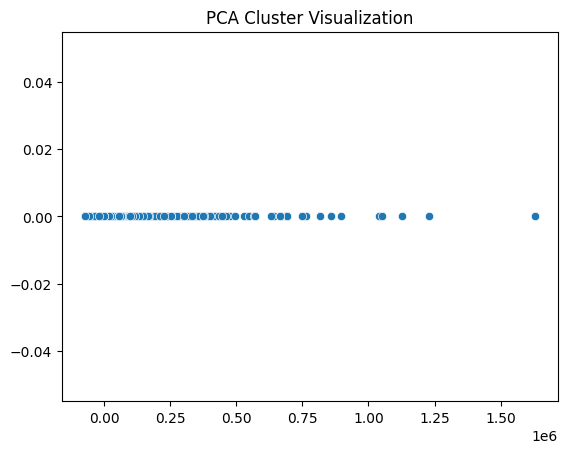

In [41]:
#Cluster visualization
pca = PCA(n_components=1)  # Change n_components to 1
reduced_data = pca.fit_transform(df[['Balance']])
sns.scatterplot(x=reduced_data[:, 0], y=[0] * len(reduced_data)) #Since we have only one principal component
#we are creating a dummy y-axis with all values as 0 to enable plotting.
plt.title('PCA Cluster Visualization')
plt.show()

2.IMPLEMENTING CLUSTERING ALGORITHMS

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [43]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


K-MEANS ALGORITHM

In [44]:
#Apply K-means clustring
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(df)

KMeans(n_clusters=3)

In [45]:
y_kmeans = kmeans.predict(df)

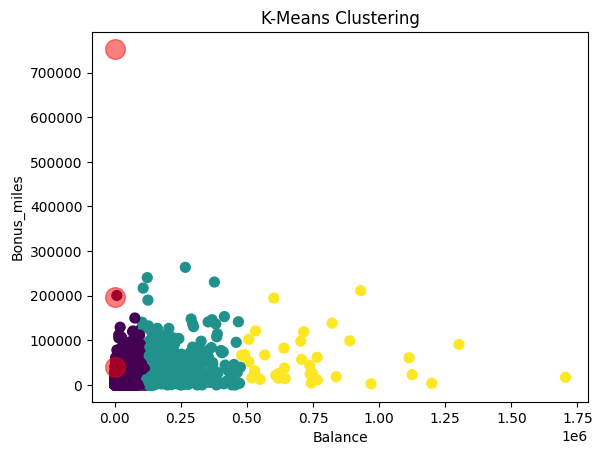

In [48]:
# Assuming 'df' contains your data, select the features for plotting
# Replace 'feature1' and 'feature2' with the actual column names from your DataFrame
X = df[['Balance', 'Bonus_miles']].values  # Example using 'Balance' and 'Bonus_miles'

# Plot the cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Balance')  # Set x-axis label
plt.ylabel('Bonus_miles')  # Set y-axis label
plt.show()


HIERARCHICAL CLUSTERING

In [49]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [50]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


In [53]:
#Apply Agglomerative Hierarchical clustring
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
hierarchical_clustering.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 0, 'Balance')

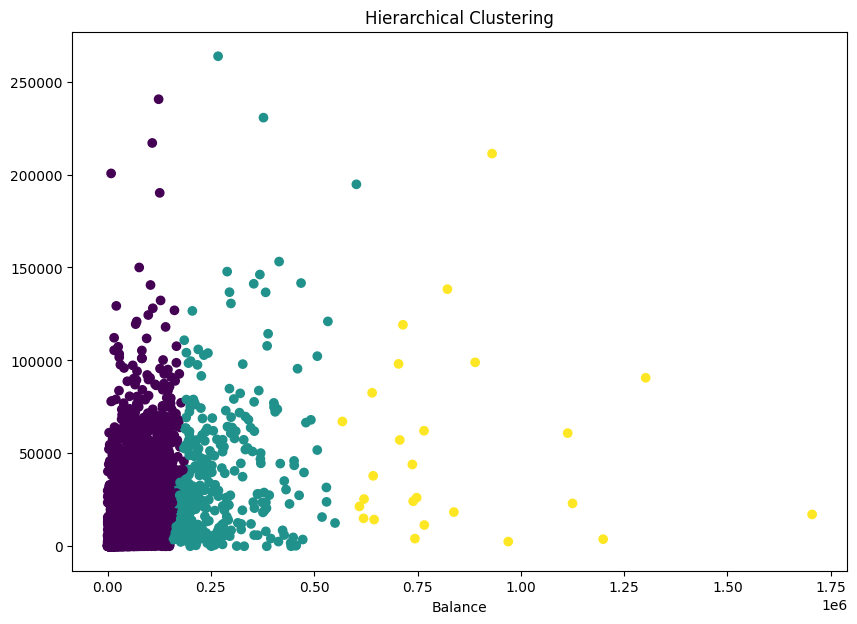

In [54]:
#Plot the cluster
plt.figure(figsize=(10, 7))
plt.scatter(df['Balance'], df['Bonus_miles'], c=hierarchical_clustering.labels_, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')

DBSCAN ALGORITHM

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [56]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)


Sheet Names: ['Description', 'data']


In [57]:
#APPLY DBSCAN Clustring
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit_predict(df)

array([-1, -1, -1, ..., -1, -1, -1])

Text(0.5, 0, 'Balance')

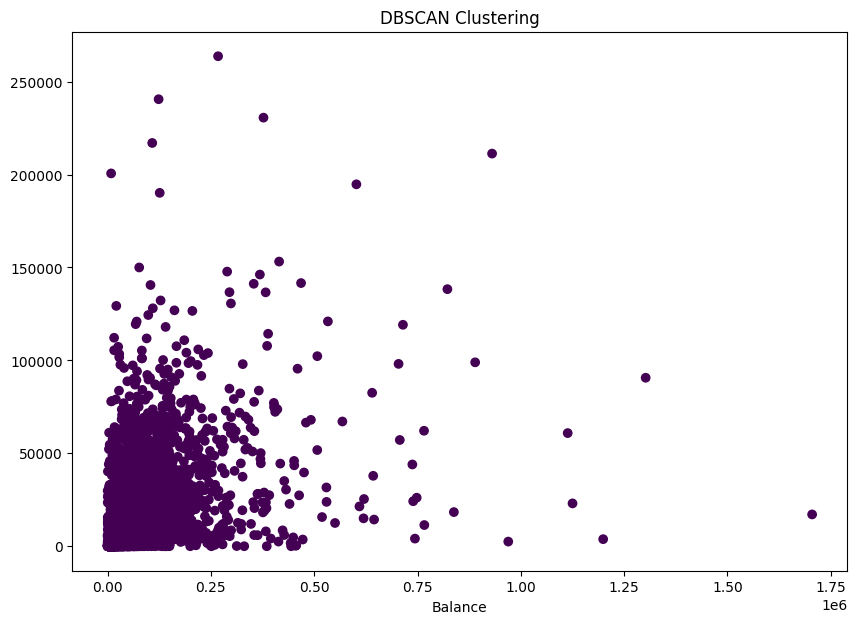

In [58]:
#plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Balance'], df['Bonus_miles'], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')

PRE PROCESSED THE DATA

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [87]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


In [62]:
#Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [63]:
#Apply K-MEANS
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [64]:
df['KMeans_Cluster'] = kmeans.labels_

Text(0, 0.5, 'Bonus_miles')

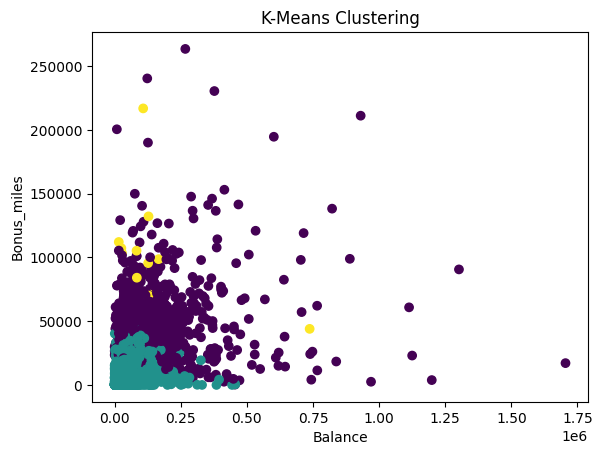

In [65]:
#Visualizing the clusters
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')

In [72]:
#Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit_predict(df_scaled)

array([ 0,  0,  0, ..., -1,  0,  0])

In [74]:
df['DBSCAN_Cluster'] = dbscan.labels_

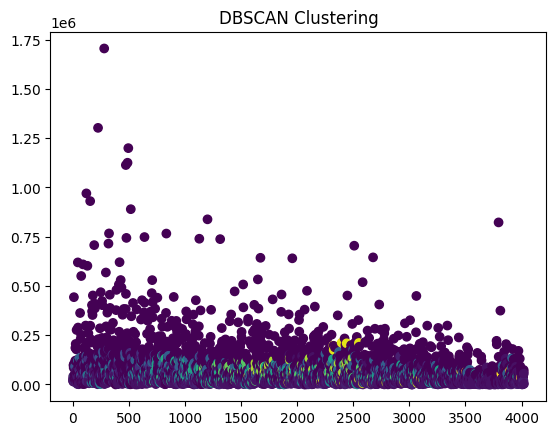

In [79]:
## Visualizing the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis') # Changed d to df and ilfoc to iloc
plt.title('DBSCAN Clustering')
plt.show()

In [83]:
# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
df['Agglomerative_Cluster'] = agg_clust.fit_predict(df_scaled)

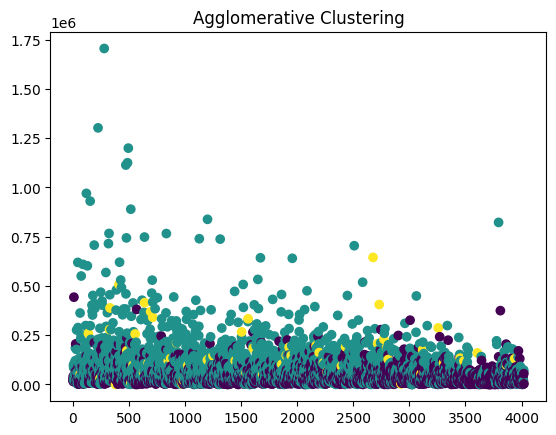

In [85]:
# Visualizing the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Agglomerative_Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [88]:
#Evaluate clustring using silhouette score
silhouette_score_kmeans = silhouette_score(df_scaled, kmeans.labels_)
silhouette_score_dbscan = silhouette_score(df_scaled, dbscan.labels_)
silhouette_score_agg = silhouette_score(df_scaled, agg_clust.labels_)

In [89]:
print("Silhouette Score (K-Means):", silhouette_score_kmeans)
print("Silhouette Score (DBSCAN):", silhouette_score_dbscan)
print("Silhouette Score (Agglomerative):", silhouette_score_agg)

Silhouette Score (K-Means): 0.29656241316142345
Silhouette Score (DBSCAN): -0.2823258834687895
Silhouette Score (Agglomerative): 0.20526614352218822


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [91]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


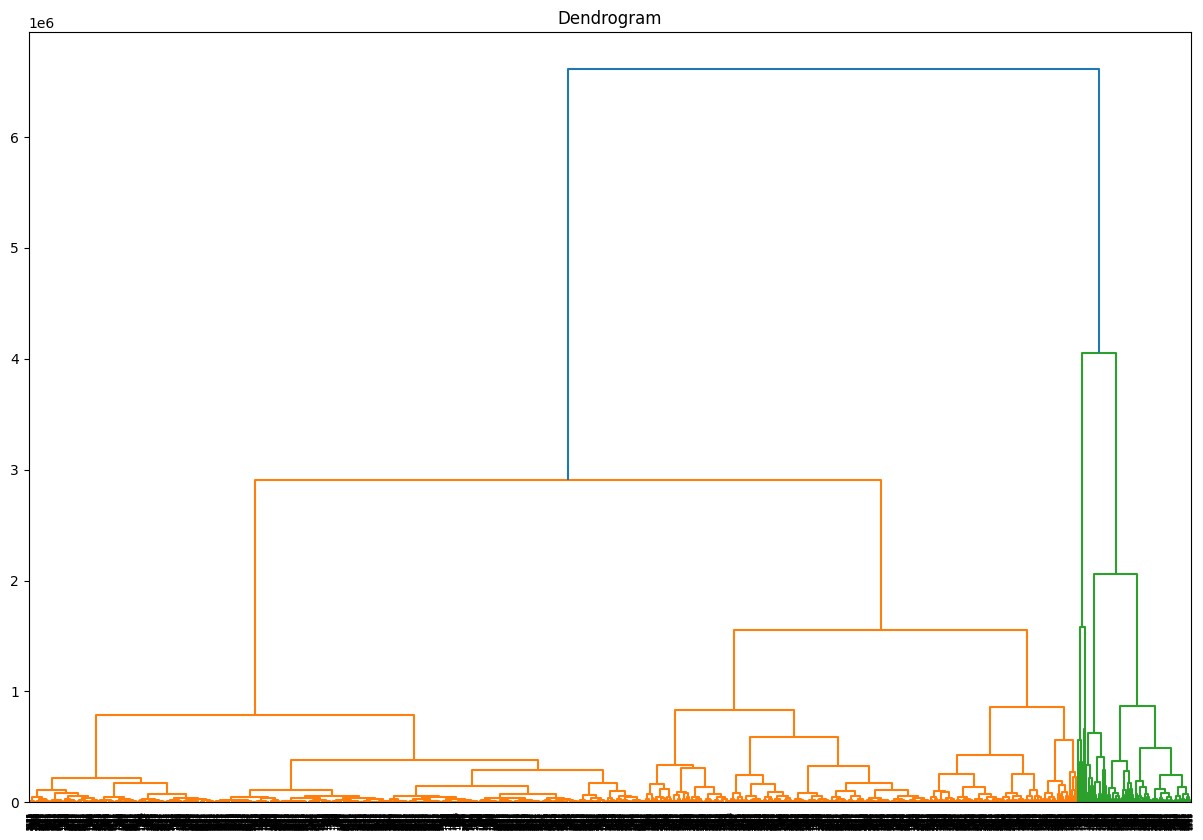

In [93]:
plt.figure(figsize=(15,10))
sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.show()

In [94]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia')

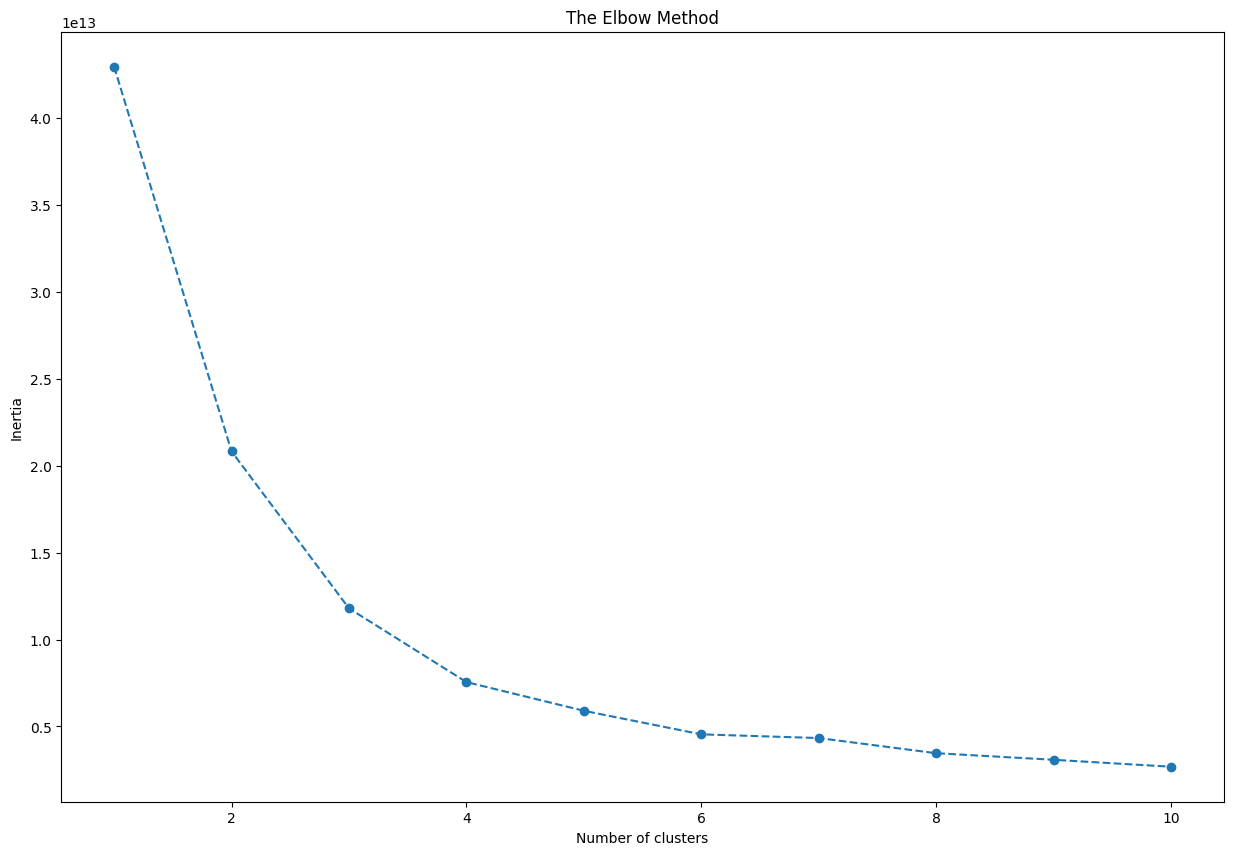

In [95]:
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [96]:
#define DBSCAN model with initial parameter
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df)

DBSCAN()

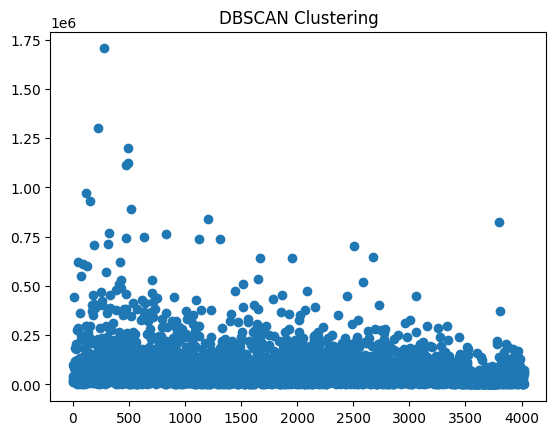

In [101]:
# Plot the results
plt.scatter(df.iloc[:, 0], df.iloc[:, 1]) # Use .iloc for integer-based indexing
plt.title('DBSCAN Clustering')
plt.show()

In [104]:
# Calculate silhouette score
# Get labels from a clustering result (e.g., from KMeans, DBSCAN, or AgglomerativeClustering)
# Assuming you have run KMeans and stored labels in 'kmeans.labels_'
labels = kmeans.labels_

# Now calculate the silhouette score
score = silhouette_score(df, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.45434300937236805


In [ ]:
#

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [106]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


In [107]:
#Standardized  the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [108]:
#Perform hierarchical clustring
z = sch.linkage(df_scaled, method='ward')

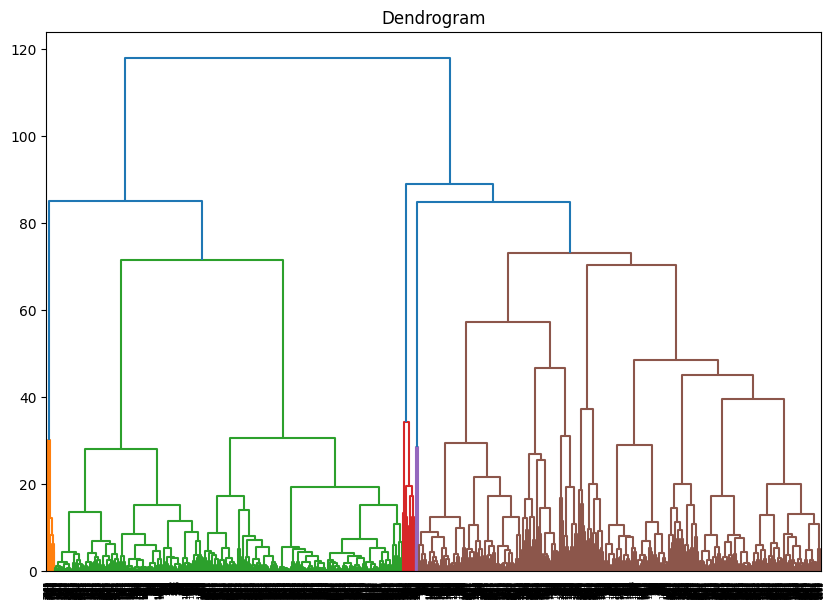

In [109]:
#plot dendrogram
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
sch.dendrogram(z)
plt.show()

In [110]:
labels_hierarchical = sch.fcluster(z, t=5, criterion='maxclust')

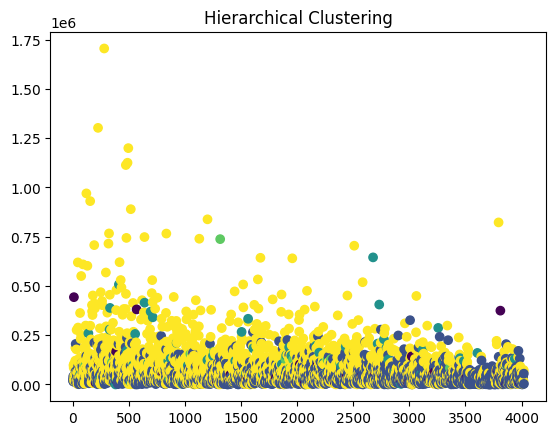

In [111]:
#Plot clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

In [113]:
#Interprettion of Hierarchical Clustering
print("Hierarchical Clustering Interpretation:")
for i in range(1, 6):
    cluster_points = df[labels_hierarchical == i]  # Use boolean indexing to select rows
    print(f"Cluster {i}:")
    print(cluster_points)
    print()

Hierarchical Clustering Interpretation:
Cluster 1:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
198    202     8669           0          1          3          1        11397   
226    230   117329           0          1          2          1         6448   
381    386   167670           0          1          3          1        15907   
392    398    11189           0          1          2          1         9044   
561    568   380930           0          2          2          1        22485   
794    804    55610           0          1          2          1         5095   
940    951    44824           0          1          3          1        21107   
1149  1161    84856           0          1          2          1         6894   
1270  1283    16103           0          1          3          1        10819   
1383  1397    18154           0          1          2     

In [114]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

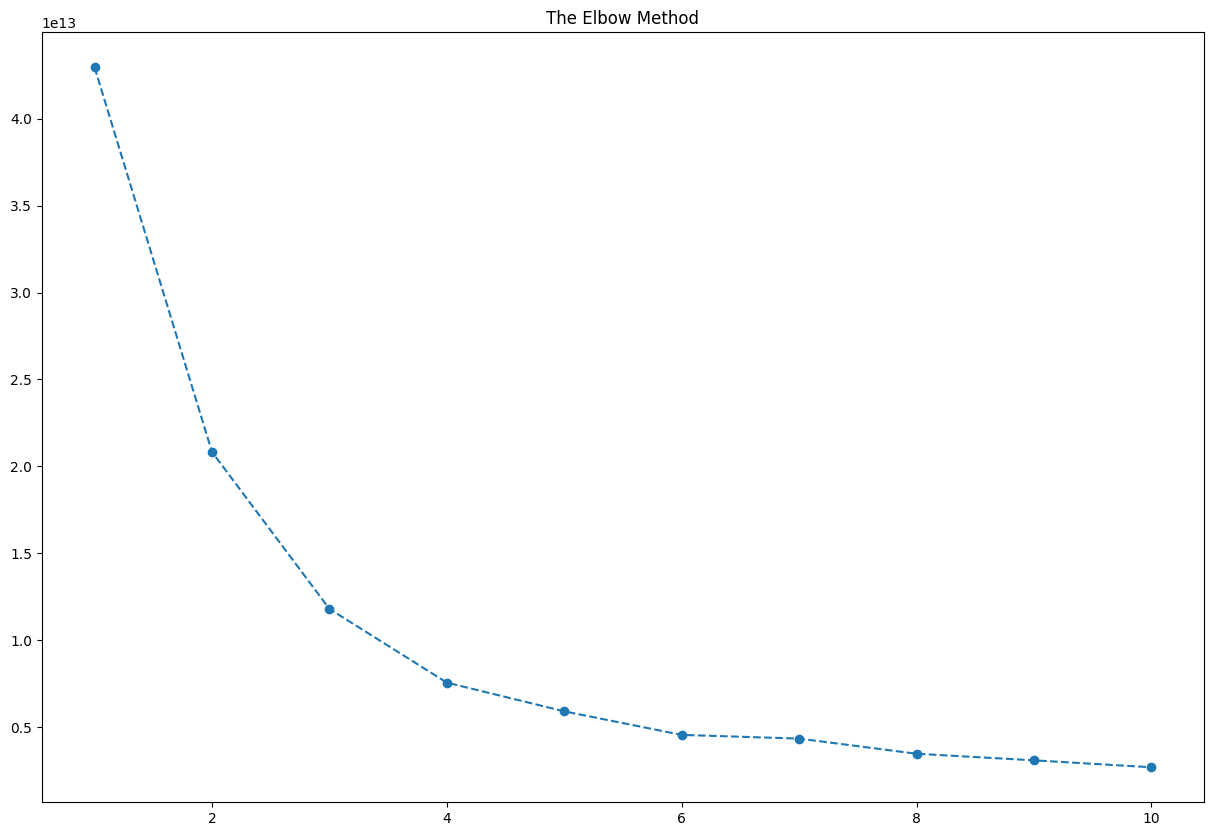

In [115]:
#Plot  Elbow curve
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt

In [117]:
# Choose the optimal K (from elbow curve, suppose K=3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df_scaled)
labels_kmeans = kmeans.labels_

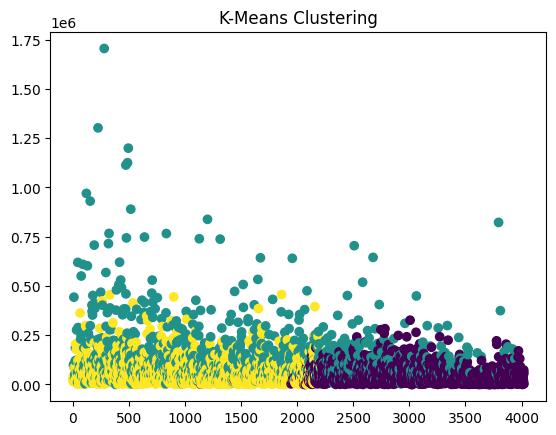

In [119]:
#plot clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

In [120]:
#Interpretation of K-Means Clustring
print("K-Means Clustering Interpretation:")
for i in range(3):
    cluster_points = df[labels_kmeans == i]
    print(f"Cluster {i+1}:")
    print(cluster_points)
    print()

K-Means Clustering Interpretation:
Cluster 1:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1129  1141     1625           0          1          1          1         1375   
1424  1438    22093           0          3          1          1        14857   
1565  1580    45916           0          1          1          1          675   
1928  1945     3082           0          1          1          1            0   
1933  1950    11355           0          1          1          1          135   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          

In [121]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_scaled)

DBSCAN()

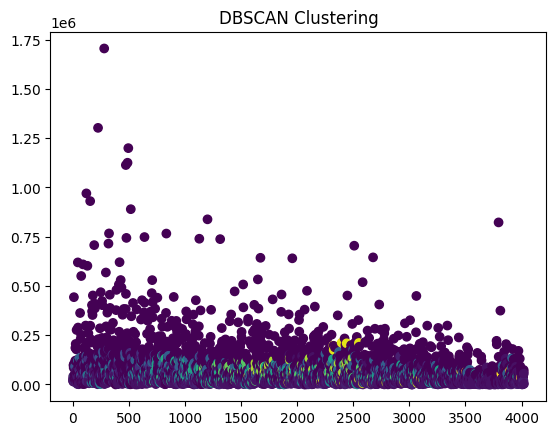

In [122]:
#plot DBSCAN clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [124]:
#Interpretation of DBSCAN Clustring
print("DBSCAN Clustering Interpretation:")
for i in range(3):
    cluster_points = df[dbscan.labels_ == i]
    print(f"Cluster {i+1}:")
    print(cluster_points)
    print()

print("\nDBSCAN Clustering Interpretation:")
unique_labels = np.unique(dbscan.labels_) # Replace 'labels_dbscan' with 'dbscan.labels_'
for label in unique_labels:
    if label == -1:
        print("\nNoise points:")
        noise_points = df[dbscan.labels_ == -1]  # Replace 'X_scaled' with 'df' and 'labels_dbscan' with 'dbscan.labels_'
        print(f"Number of noise points: {noise_points.shape[0]}")
    else:
        cluster_points = df[dbscan.labels_ == label]  # Replace 'X_scaled' with 'df' and 'labels_dbscan' with 'dbscan.labels_'
        print(f"\nCluster {label + 1}:")
        print(f"Mean Feature 1: {np.mean(cluster_points.iloc[:, 0]):.2f}")  # Use .iloc for column selection
        print(f"Mean Feature 2: {np.mean(cluster_points.iloc[:, 1]):.2f}")  # Use .iloc for column selection
        print(f"Number of points in this cluster: {cluster_points.shape[0]}")

DBSCAN Clustering Interpretation:
Cluster 1:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3990  4013    11310           0          1          1          1         5021   
3992  4015    11181           0          1          1          1          929   
3993  4016     3974           0          1          1          1          365   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1

In [126]:
# Silhouette Score for K-Means and DBSCAN
sil_score_kmeans = silhouette_score(df_scaled, labels_kmeans)  # Use df_scaled instead of X_scaled
sil_score_dbscan = silhouette_score(df_scaled, dbscan.labels_) if len(set(dbscan.labels_)) > 1 else -1  # Use dbscan.labels_ and df_scaled

print(f"\nSilhouette Score for K-Means: {sil_score_kmeans:.2f}")
print(f"Silhouette Score for DBSCAN: {sil_score_dbscan:.2f}")


Silhouette Score for K-Means: 0.20
Silhouette Score for DBSCAN: -0.28


Visualization

In [127]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [128]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


Text(0.5, 0, 'Balance')

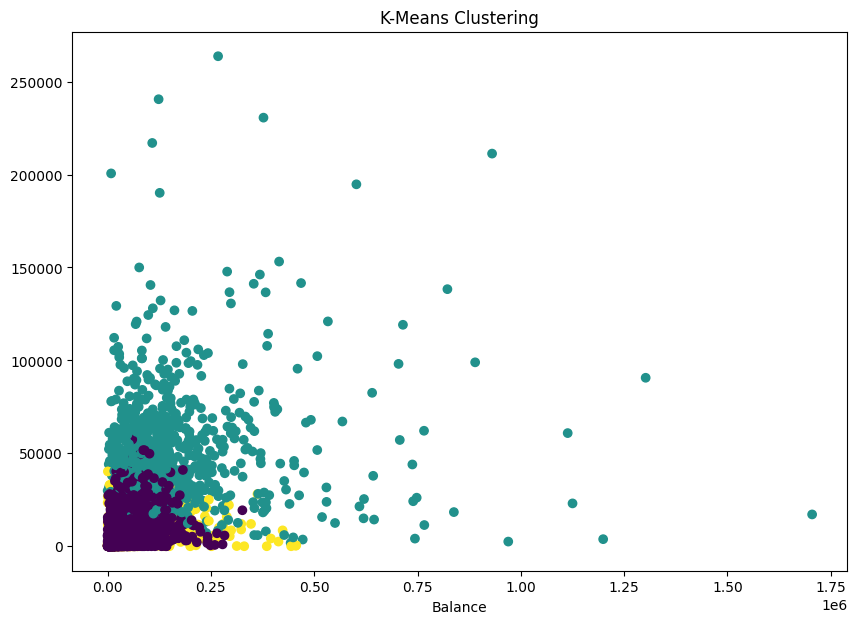

In [129]:
#Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Balance'], df['Bonus_miles'], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Balance')

NameError: name 'data' is not defined

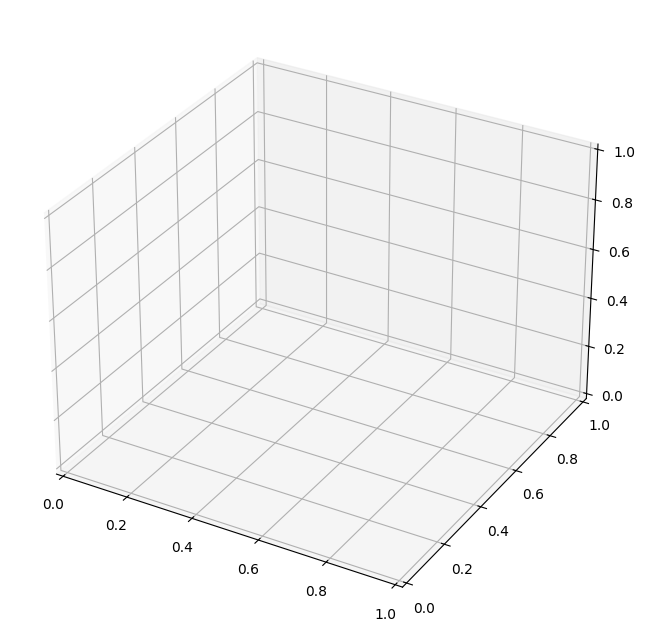

In [130]:
# Plot 3D clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7)
ax.set_title("3D Clustering Visualization")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df)

Evaluation and Performance Metrics


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [134]:
#Load the dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')

#Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Description', 'data']


In [138]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
kmeans_silhouette = silhouette_score(df, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")


K-Means Silhouette Score: 0.59


In [142]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)

# Check the number of unique labels (excluding noise -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Calculate silhouette score only if there are at least 2 clusters
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
else:
    print("DBSCAN found only one cluster or all points are noise. Silhouette score cannot be calculated.")

DBSCAN found only one cluster or all points are noise. Silhouette score cannot be calculated.


In [147]:
# Exclude noise points (label = -1) for silhouette score calculation
valid_dbscan_labels = dbscan_labels[dbscan_labels != -1]
valid_df = df[dbscan_labels != -1]
if len(valid_dbscan_labels) > 1:
    # Exclude noise points (label = -1) for silhouette score calculation
    valid_dbscan_labels = dbscan_labels[dbscan_labels != -1]
    valid_df = df[dbscan_labels != -1]
    if len(valid_dbscan_labels) > 1:
        dbscan_silhouette = silhouette_score(valid_df, valid_dbscan_labels)
        print(f"DBSCAN Silhouette Score (excluding noise points): {dbscan_silhouette:.2f}")
else:
    print("DBSCAN found only one cluster or all points are noise. Silhouette score cannot be calculated.")

DBSCAN found only one cluster or all points are noise. Silhouette score cannot be calculated.
